[Dataset-Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
url = "https://raw.githubusercontent.com/dafne20/Life-Expectancy-Data2.csv/main"
df = pd.read_csv(url+"/Texto/Life%20Expectancy%20Data2.csv")
df.columns = df.columns.str.strip()
df.set_index("Country", inplace=True)
df['Status'] = df['Status'].replace(['Developing', 'Developed'], [0, 1])
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,0,65.000,263.000,62,0.010,71.280,65.000,1154,19.100,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
Afghanistan,2014,0,59.900,271.000,64,0.010,73.524,62.000,492,18.600,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
Afghanistan,2013,0,59.900,268.000,66,0.010,73.219,64.000,430,18.100,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
Afghanistan,2012,0,59.500,272.000,69,0.010,78.184,67.000,2787,17.600,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
Afghanistan,2011,0,59.200,275.000,71,0.010,7.097,68.000,3013,17.200,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


## 1. EDA

In [3]:
print(f"""
filas   : {df.shape[0]}
columnas: {df.shape[1]}""")


filas   : 2938
columnas: 21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expen

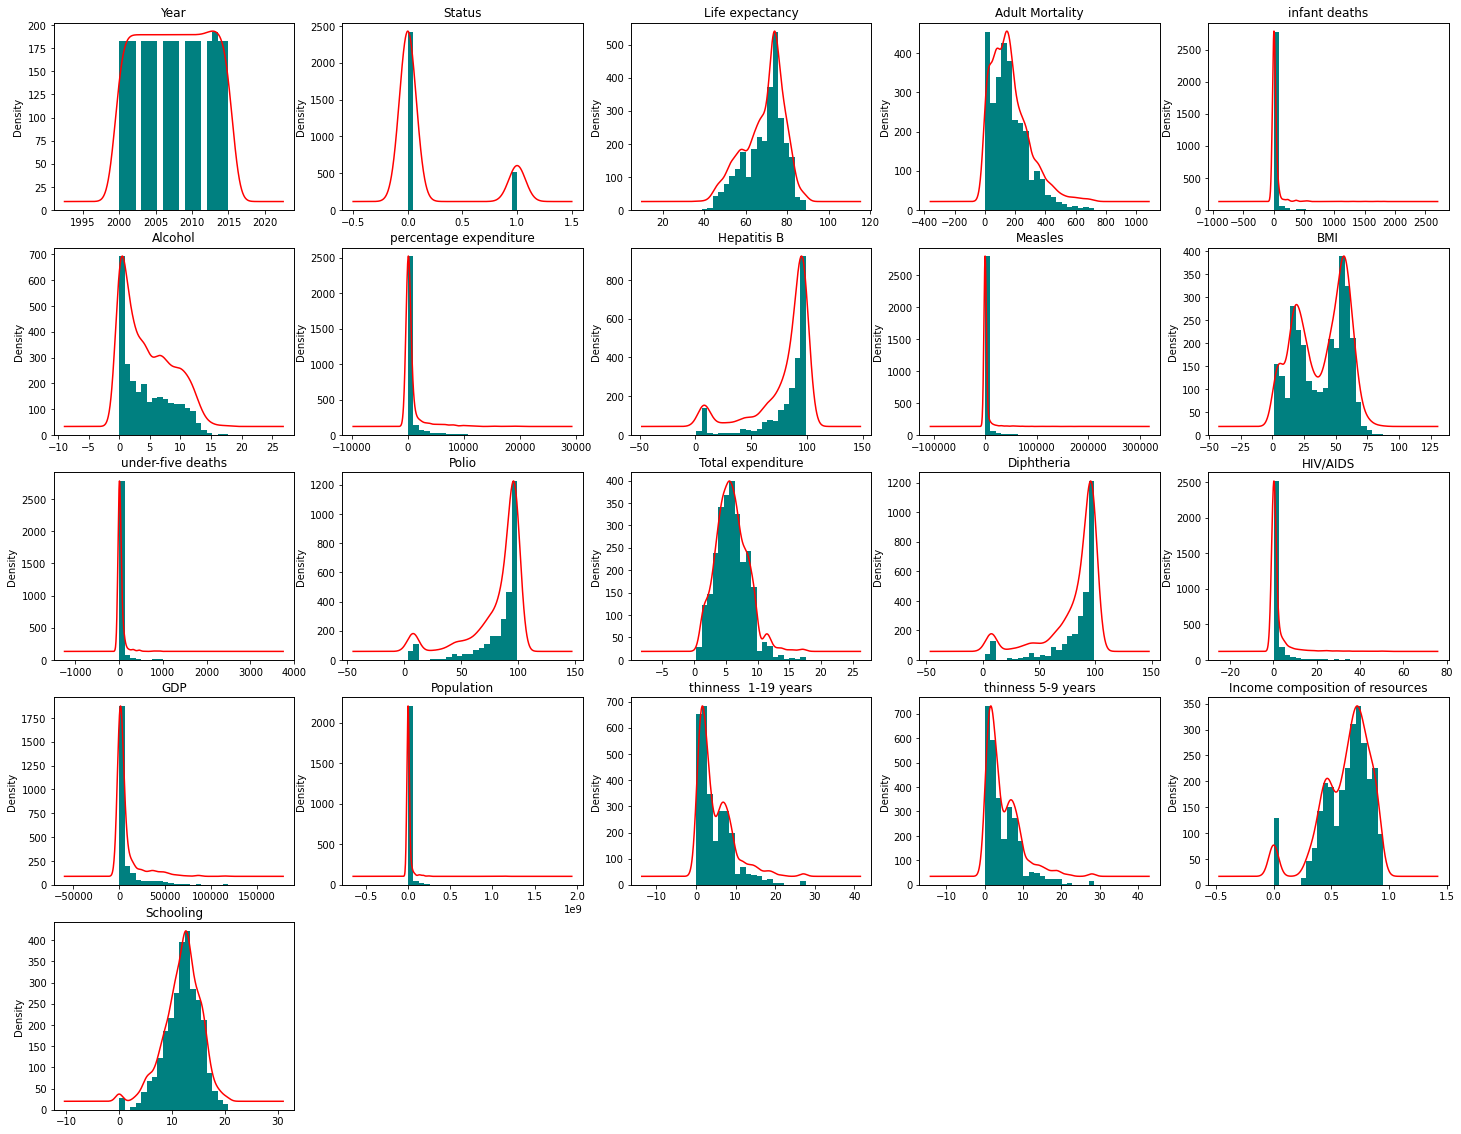

In [5]:
plt.figure(figsize=(25,20))
names = df.columns
for i in range(21):
  plt.subplot(5, 5, i+1)
  df[names[i]].hist(color="teal", bins=20)
  df[names[i]].plot(kind="kde", secondary_y=True, color="red")
  plt.title(names[i])
  plt.yticks([])

In [6]:
df.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000,2938.000,2928.000,2928.000,2938.000,2744.000,2938.000,2385.000,2938.000,2904.000,...,2919.000,2712.000,2919.000,2938.000,2490.000,2286.000,2904.000,2904.000,2771.000,2775.000
mean,2007.519,0.174,69.225,164.796,30.304,4.603,738.251,80.940,2419.592,38.321,...,82.550,5.938,82.324,1.742,7483.158,12753375.120,4.840,4.870,0.628,11.993
std,4.614,0.379,9.524,124.292,117.927,4.052,1987.915,25.070,11467.272,20.044,...,23.428,2.498,23.717,5.078,14270.169,61012096.508,4.420,4.509,0.211,3.359
min,2000.000,0.000,36.300,1.000,0.000,0.010,0.000,1.000,0.000,1.000,...,3.000,0.370,2.000,0.100,1.681,34.000,0.100,0.100,0.000,0.000
25%,2004.000,0.000,63.100,74.000,0.000,0.877,4.685,77.000,0.000,19.300,...,78.000,4.260,78.000,0.100,463.936,195793.250,1.600,1.500,0.493,10.100
50%,2008.000,0.000,72.100,144.000,3.000,3.755,64.913,92.000,17.000,43.500,...,93.000,5.755,93.000,0.100,1766.948,1386542.000,3.300,3.300,0.677,12.300
75%,2012.000,0.000,75.700,228.000,22.000,7.703,441.534,97.000,360.250,56.200,...,97.000,7.492,97.000,0.800,5910.806,7420359.000,7.200,7.200,0.779,14.300
max,2015.000,1.000,89.000,723.000,1800.000,17.870,19479.912,99.000,212183.000,87.300,...,99.000,17.600,99.000,50.600,119172.742,1293859294.000,27.700,28.600,0.948,20.700


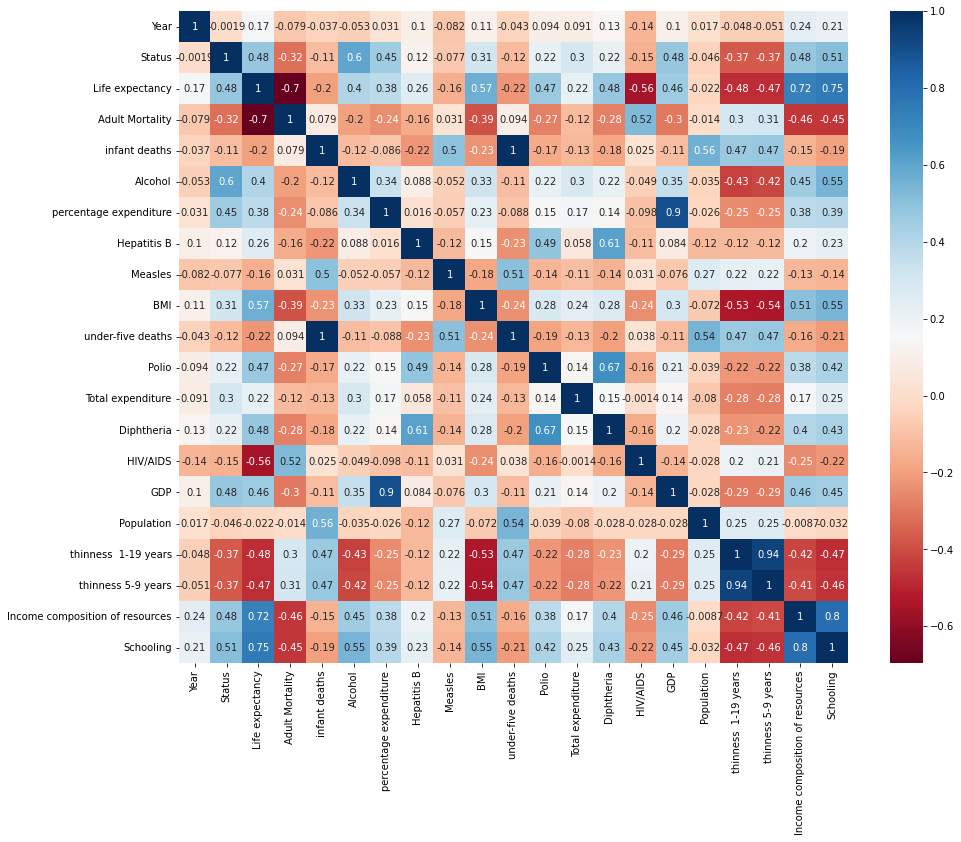

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, cmap="RdBu");

In [8]:
df.isna().mean().to_frame("missingpercent").query("missingpercent > 0")

,missingpercent
Life expectancy,0.003
Adult Mortality,0.003
Alcohol,0.066
Hepatitis B,0.188
BMI,0.012
Polio,0.006
Total expenditure,0.077
Diphtheria,0.006
GDP,0.152
Population,0.222


> 14 variables tienen valores perdidos, siendo `Population` la variable con mayor porcentaje de valores nulos con 22.2%  

## 2. Primer modelo

### 2.1. Eliminando registros con valores nulos

In [9]:
df.dropna(inplace=True)
df.isna().sum().to_frame("missing").query("missing > 0")

,missing


In [10]:
df.shape

(1649, 21)

> Se eliminaron 1289 registros

In [11]:
X = df.drop("Life expectancy", axis=1)
y = df["Life expectancy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 2.2. Coeficientes

In [12]:
modelo = LinearRegression().fit(X_train, y_train)
y_pred = modelo.predict(X_test)

for name, coef in zip(X.columns, modelo.coef_):
    print(f"{name:<31}: {coef:>6.3f}")

Year                           : -0.108
Status                         :  0.926
Adult Mortality                : -0.016
infant deaths                  :  0.092
Alcohol                        : -0.168
percentage expenditure         :  0.000
Hepatitis B                    : -0.007
Measles                        : -0.000
BMI                            :  0.023
under-five deaths              : -0.069
Polio                          :  0.006
Total expenditure              :  0.119
Diphtheria                     :  0.016
HIV/AIDS                       : -0.436
GDP                            : -0.000
Population                     : -0.000
thinness  1-19 years           : -0.039
thinness 5-9 years             : -0.054
Income composition of resources:  9.242
Schooling                      :  1.028


### 2.3. Evaluacion del modelo

In [13]:
modelo = LinearRegression()

r2 = cross_val_score(modelo, X, y, cv=10, scoring="r2")
rmse=cross_val_score(modelo, X, y, cv=10, scoring="neg_mean_squared_error")

print(f"R2: {np.mean(r2):.3f}\nMSE: {np.abs(np.mean(rmse)):.3f}")

R2: 0.782
MSE: 15.211


> Esta es la forma mas simple de conseguir un resultado, pero este R2 y RMSE pueden mejorar aun más.

## 3. Modelo con tratamiento de variables

In [14]:
df = pd.read_csv(url+"/Texto/Life%20Expectancy%20Data2.csv")
df.columns = df.columns.str.strip()
df.set_index("Country", inplace=True)
df['Status'] = df['Status'].replace(['Developing', 'Developed'], [0, 1])
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,0,65.000,263.000,62,0.010,71.280,65.000,1154,19.100,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
Afghanistan,2014,0,59.900,271.000,64,0.010,73.524,62.000,492,18.600,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
Afghanistan,2013,0,59.900,268.000,66,0.010,73.219,64.000,430,18.100,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
Afghanistan,2012,0,59.500,272.000,69,0.010,78.184,67.000,2787,17.600,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
Afghanistan,2011,0,59.200,275.000,71,0.010,7.097,68.000,3013,17.200,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


### 3.1 Valores nulos NaN

KNN Imputer method

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
cols = df.columns
imputer = IterativeImputer(max_iter=50, initial_strategy="median")
df = imputer.fit_transform(df.values)

df = pd.DataFrame(df, columns=cols)
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015.000,0.000,65.000,263.000,62.000,0.010,71.280,65.000,1154.000,19.100,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,2014.000,0.000,59.900,271.000,64.000,0.010,73.524,62.000,492.000,18.600,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,2013.000,0.000,59.900,268.000,66.000,0.010,73.219,64.000,430.000,18.100,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,2012.000,0.000,59.500,272.000,69.000,0.010,78.184,67.000,2787.000,17.600,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,2011.000,0.000,59.200,275.000,71.000,0.010,7.097,68.000,3013.000,17.200,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [16]:
df.isna().mean().to_frame("missingpercent").query("missingpercent > 0")

,missingpercent


### 3.2. T-test

In [17]:
X = df.drop("Life expectancy", axis=1)
y = df['Life expectancy']

In [18]:
model = sm.OLS(y, X.assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     755.1
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        21:43:38   Log-Likelihood:                -8112.6
No. Observations:                2938   AIC:                         1.627e+04
Df Residuals:                    2917   BIC:                         1.639e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Year      

> Se seleccionan las variables con un valor P menor a 0.01

In [19]:
pfilter=results.pvalues.to_frame("pval").query("pval < 0.01")
pfilter

,pval
Year,0.003
Status,0.000
Adult Mortality,0.000
infant deaths,0.000
BMI,0.000
under-five deaths,0.000
Polio,0.000
Diphtheria,0.000
HIV/AIDS,0.000
GDP,0.000


## 4. Multicolinealidad

In [20]:
X = df[list(pfilter.index)[:-1]]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]

vif_data.sort_values(by="VIF",ascending=False)

,feature,VIF
5,under-five deaths,178.987
3,infant deaths,176.797
11,Schooling,48.660
0,Year,39.944
10,Income composition of resources,31.684
6,Polio,25.918
7,Diphtheria,25.886
4,BMI,7.222
2,Adult Mortality,4.889
1,Status,1.851


In [21]:
X = df[['HIV/AIDS', 'GDP', 'Status', 'Adult Mortality', 'BMI', 'Diphtheria', 
        'Schooling','under-five deaths', 'Income composition of resources']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]

vif_data.sort_values(by="VIF",ascending=False)

,feature,VIF
6,Schooling,40.836
8,Income composition of resources,31.021
5,Diphtheria,14.026
4,BMI,7.158
3,Adult Mortality,3.350
2,Status,1.766
1,GDP,1.712
0,HIV/AIDS,1.550
7,under-five deaths,1.096


In [22]:
from scipy.stats import shapiro

for i in X.columns:
  stat, p = shapiro(df[i])
  print(f'Statistics {i:<31}: {stat:.3f}, p={p:.3f}')

Statistics HIV/AIDS                       : 0.357, p=0.000
Statistics GDP                            : 0.529, p=0.000
Statistics Status                         : 0.459, p=0.000
Statistics Adult Mortality                : 0.917, p=0.000
Statistics BMI                            : 0.932, p=0.000
Statistics Diphtheria                     : 0.688, p=0.000
Statistics Schooling                      : 0.980, p=0.000
Statistics under-five deaths              : 0.240, p=0.000
Statistics Income composition of resources: 0.914, p=0.000


In [26]:
ranges = []
for i in X[['HIV/AIDS', 'GDP', 'Adult Mortality', 'BMI', 'Diphtheria',
        'Schooling','under-five deaths', 'Income composition of resources']]:
  ranges.append(list(pd.qcut(X[i], 10, duplicates="drop").value_counts()))

In [27]:
ranges

[[2089, 293, 291, 265],
 [294, 294, 294, 294, 294, 294, 294, 294, 293, 293],
 [305, 301, 299, 298, 295, 293, 292, 290, 288, 277],
 [302, 299, 297, 294, 293, 293, 291, 290, 290, 289],
 [459, 388, 350, 349, 322, 301, 298, 270, 201],
 [318, 313, 303, 298, 297, 296, 295, 279, 276, 263],
 [1146, 297, 293, 291, 290, 287, 171, 163],
 [298, 297, 297, 295, 295, 294, 294, 290, 290, 288]]

In [28]:
for i in X[['HIV/AIDS', 'GDP', 'Adult Mortality', 'BMI', 'Diphtheria', 
        'Schooling','under-five deaths', 'Income composition of resources']]:
  X[i] = pd.qcut(X[i], 10, labels=False, duplicates="drop")

X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,HIV/AIDS,GDP,Status,Adult Mortality,BMI,Diphtheria,Schooling,under-five deaths,Income composition of resources
0,0,2,0.000,8,2,1,2,6,2
1,0,2,0.000,8,2,1,2,6,2
2,0,3,0.000,8,2,1,2,7,2
3,0,3,0.000,8,2,1,2,7,2
4,0,0,0.000,8,1,1,2,7,1


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
modelo = LinearRegression().fit(X_train, y_train)
y_pred = modelo.predict(X_test)

for name, coef in zip(X.columns, modelo.coef_):
    print(f"{name:<31}: {coef:>6.3f}")

HIV/AIDS                       : -3.726
GDP                            :  0.201
Status                         :  0.949
Adult Mortality                : -0.411
BMI                            : -0.025
Diphtheria                     :  0.167
Schooling                      :  0.251
under-five deaths              : -0.333
Income composition of resources:  1.054


In [30]:
from sklearn.metrics import r2_score, mean_squared_error

print(f"""R2  : {r2_score(y_test, y_pred):.3f}
MSE : {mean_squared_error(y_test, y_pred):.3f}""")

R2  : 0.871
MSE : 12.387
